In [2]:
import numpy as np
def read_csv ( csv_path ):
    np_path_XYs = np . genfromtxt ( csv_path , delimiter = ',')
    path_XYs = []
    for i in np . unique ( np_path_XYs [: , 0]):
        npXYs = np_path_XYs [ np_path_XYs [: , 0] == i ][: , 1:]
        XYs = []
        for j in np . unique ( npXYs [: , 0]):
            XY = npXYs [ npXYs [: , 0] == j ][: , 1:]
            XYs . append ( XY )
        path_XYs . append ( XYs )
    return path_XYs
isolated=read_csv('D:/Adobegen Hackathon/problems/problems/isolated.csv')
isolated_sol=read_csv('D:/Adobegen Hackathon/problems/problems/isolated_sol.csv')

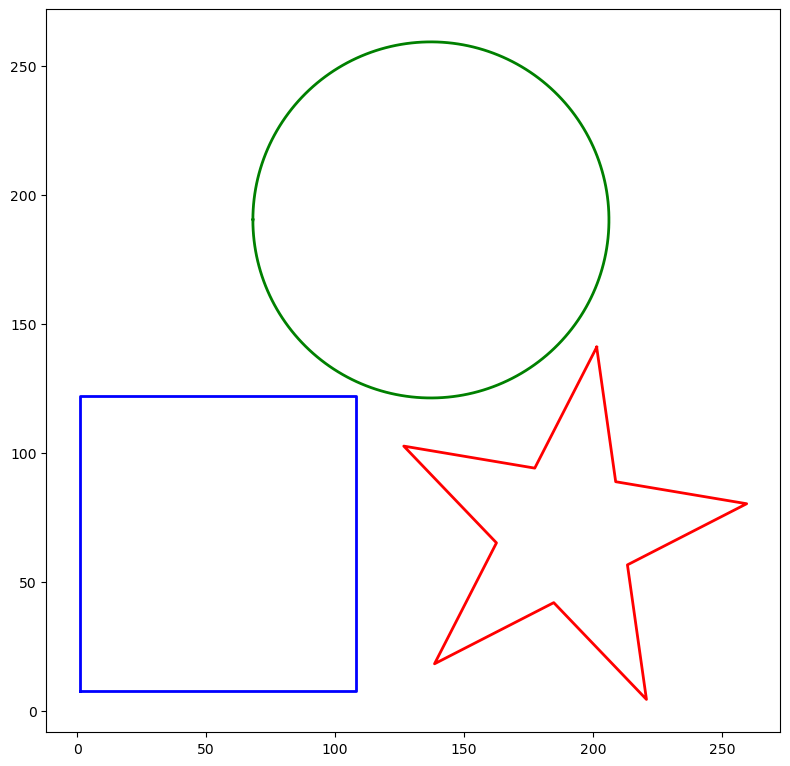

In [3]:
import numpy as np
import matplotlib . pyplot as plt
def plot ( paths_XYs,horizontalline=None ):
    fig , ax = plt . subplots ( tight_layout = True , figsize =(8 , 8))
    colors=['red','green','blue','purple']
    for i , XYs in enumerate (paths_XYs):
        c = colors[ i % len(colors)]
        for XY in XYs :
            ax.plot ( XY [: , 0] , XY [: , 1] , c =c , linewidth =2)

    ax.set_aspect ('equal')
    if horizontalline:
        plt.axhline(horizontalline)
    plt.show ()
plot(isolated_sol)

In [4]:
def segregate_shapes(array):
    shapes_in_pic={}
    for i in range(len(array)):
        shapes_in_pic[f"{i}th"]=array[i][0]
    return list(shapes_in_pic.values())


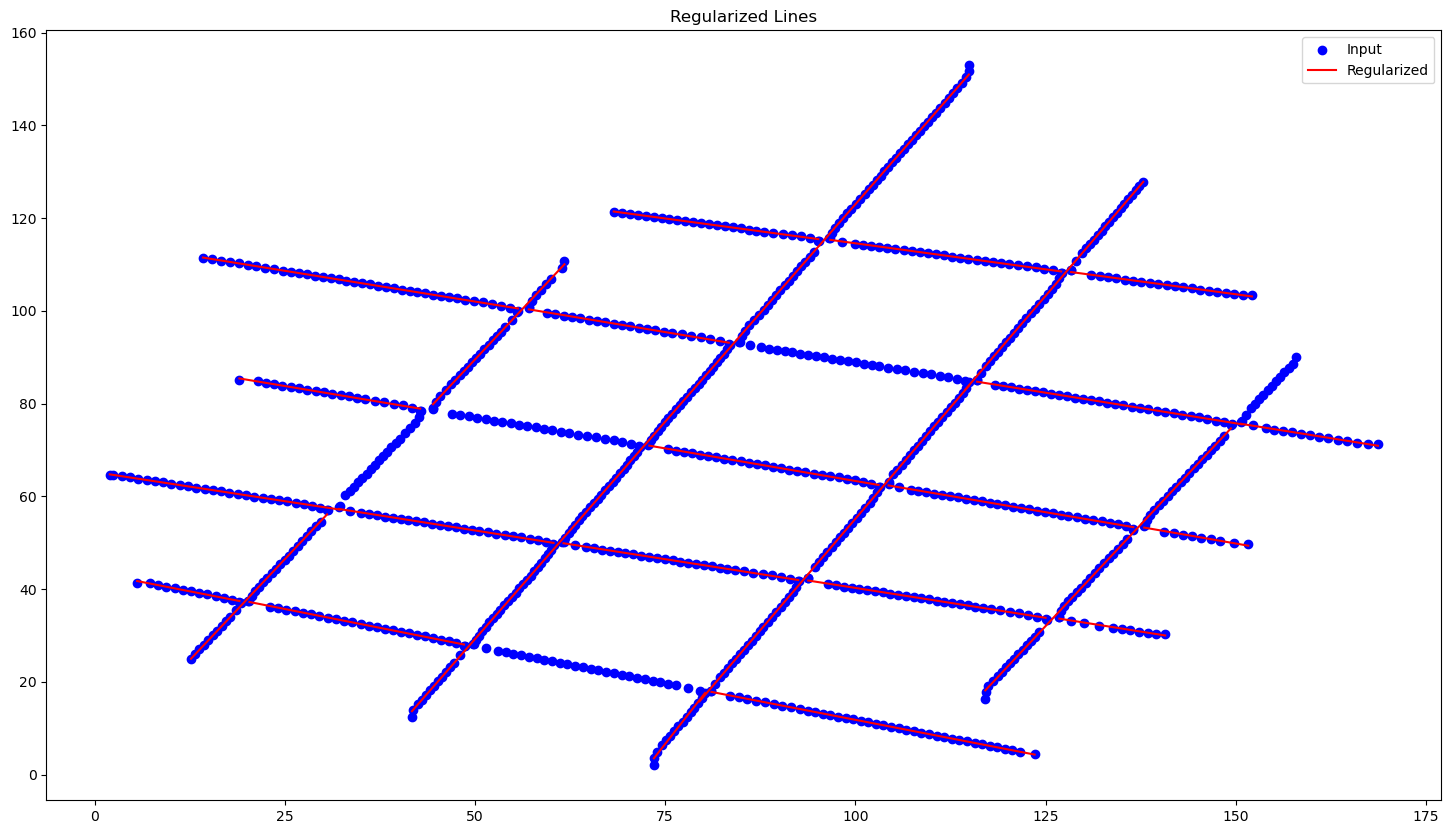

In [5]:
from skimage.measure import LineModelND, ransac
def detect_and_regularize_lines(points, threshold=1):
    model_robust, inliers = ransac(points, LineModelND, min_samples=2, residual_threshold=threshold, max_trials=500)
    if inliers is None:
        return None, None, None, None

    outliers = ~inliers
    line_x = np.array([points[inliers][:, 0].min(), points[inliers][:, 0].max()])
    line_y = model_robust.predict_y(line_x)
    return line_x, line_y, inliers, outliers

frag=read_csv('D:/Adobegen Hackathon/problems/problems/frag2.csv')
frag0=segregate_shapes(frag)
plt.figure(figsize=(18,10))

# Iterate over the segregated shapes
for i in range(len(frag0)):
    line_x, line_y, inliers, outliers = detect_and_regularize_lines(frag0[i])
    
    # Plot the original points
    plt.scatter(frag0[i][:, 0], frag0[i][:, 1], color='blue', label="Input" if i == 0 else "")
    
    # Plot the regularized lines
    plt.plot(line_x, line_y, color='red', label="Regularized" if i == 0 else "")
    
# Set the title
plt.title("Regularized Lines")

# Add the legend outside the loop
plt.legend()

# Display the plot
plt.show()


        
        

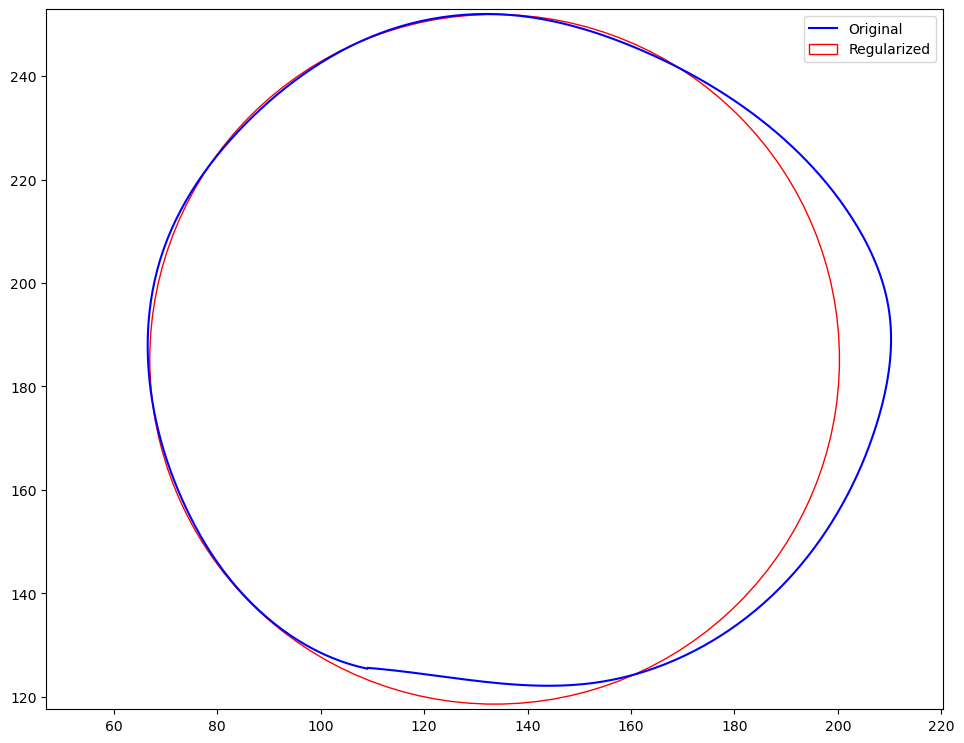

In [6]:
from skimage.measure import CircleModel,ransac
def detect_and_regularize_circles(points,threshold=1):
    model_robust,inliers=ransac(points,CircleModel,min_samples=3,residual_threshold=threshold,max_trials=1000)
    if inliers is None:
        return None,None,None,None
    centerx,centery,radius=model_robust.params
    outliers=~inliers
    return centerx, centery, radius, inliers, outliers
frag=read_csv('D:/Adobegen Hackathon/problems/problems/isolated.csv')
frag0=segregate_shapes(frag)
plt.figure(figsize=(20,20))
    # Detect and regularize circles
centerx, centery, radius, inliers, outliers = detect_and_regularize_circles(frag0[0])

        # Create a subplot for each detected shape
ax = plt.subplot(2, 1, 1)  # Create subplots

        # Plot original points
ax.plot(frag0[0][:, 0], frag0[0][:, 1], 'b', label='Original')

        # Plot regularized circle
regularized = plt.Circle((centerx, centery), radius, color='red', fill=False, label='Regularized')
ax.add_patch(regularized)

        # Set the limits of the plot to fit the circle
ax.set_xlim(centerx - radius - 20, centerx + radius + 20)
ax.set_ylim(centery - radius - 1, centery + radius + 1)

        # Keep the aspect ratio of the plot square
ax.set_aspect('equal')

        # Add a legend
plt.legend()
# Display the final plot
plt.show()


In [7]:
from skimage.measure import EllipseModel

def detect_and_regularize_ellipses(points, threshold=1):
    model_robust, inliers = ransac(points, EllipseModel, min_samples=5, residual_threshold=threshold, max_trials=1000)
    if inliers is None:
        return None, None, None, None

    xc, yc, a, b, theta = model_robust.params
    outliers = ~inliers
    return (xc, yc, a, b, theta), inliers, outliers


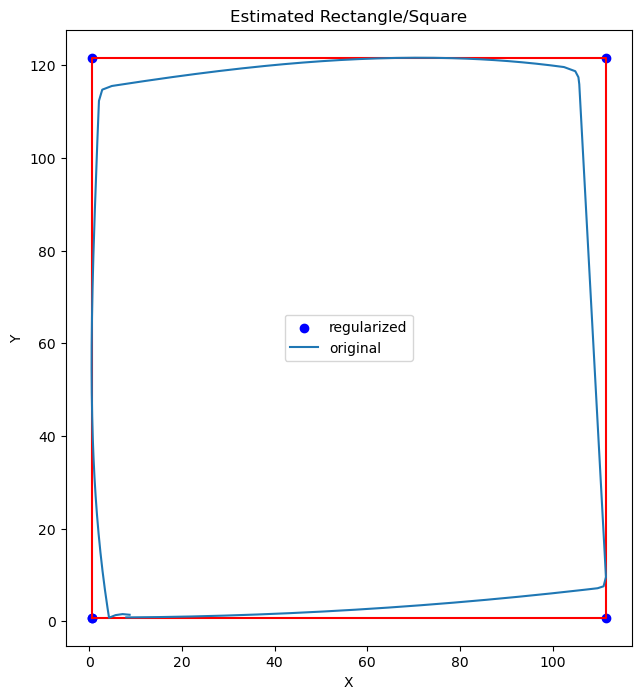

In [46]:
def detect_and_regularize_rectangles(points):
    min_x,min_y,max_x,max_y=points[:,0].min(),points[:,1].min(),points[:,0].max(),points[:,1].max()
    corners = [
        (min_x, min_y),  # Bottom-left
        (min_x, max_y),  # Top-left
        (max_x, max_y),  # Top-right
        (max_x, min_y),  # Bottom-right
        (min_x, min_y)   # Closing the loop
    ]
    x_coords, y_coords = zip(*corners)
    
    # Plotting
    plt.figure(figsize=(16,8))
    plt.plot(x_coords, y_coords, 'r-')  # Red line
    plt.scatter(x_coords, y_coords, color='blue',label="regularized")
    plt.plot(points[:,0],points[:,1],label="original")
  # Corner points
    plt.title("Estimated Rectangle/Square")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

detect_and_regularize_rectangles(frag0[2])


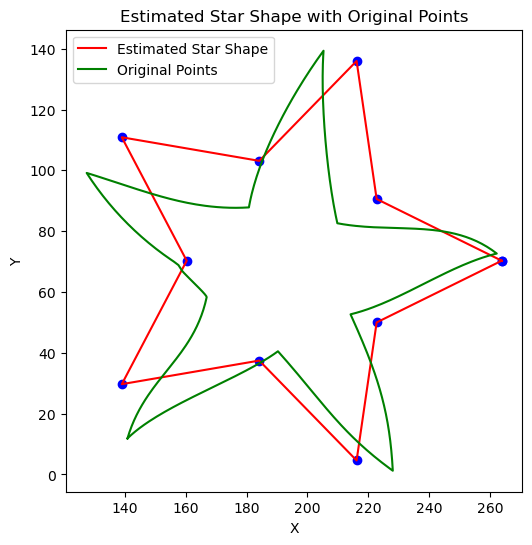

In [57]:
def plot_star(input_points, num_points=5):
    min_x, min_y = input_points[:, 0].min(), input_points[:, 1].min()
    max_x, max_y = input_points[:, 0].max(), input_points[:, 1].max()

    # Calculate the center
    center_x = (min_x + max_x) / 2
    center_y = (min_y + max_y) / 2
    
    # Outer radius (distance from center to max_x or max_y)
    outer_radius = max(max_x - center_x, max_y - center_y)
    
    # Inner radius (fraction of the outer radius)
    inner_radius = outer_radius * 0.5
    
    # Angles for the star points
    angles = np.linspace(0, 2 * np.pi, num_points * 2, endpoint=False)
    
    # Calculate the coordinates for the star vertices
    star_points = []
    for i in range(len(angles)):
        radius = outer_radius if i % 2 == 0 else inner_radius
        x = center_x + radius * np.cos(angles[i])
        y = center_y + radius * np.sin(angles[i])
        star_points.append((x, y))
    
    # Close the star shape by appending the first point at the end
    star_points.append(star_points[0])
    
    # Unzip the star points to get the x and y coordinates
    x_coords, y_coords = zip(*star_points)
    
    # Plotting
    plt.figure(figsize=(6, 6))
    plt.plot(x_coords, y_coords, 'r-', label="Estimated Star Shape")  # Red line for star
    plt.scatter(x_coords, y_coords, color='blue')  # Star vertices
    plt.plot(input_points[:, 0], input_points[:, 1], 'g-', label="Original Points")
    plt.title("Estimated Star Shape with Original Points")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Example Usage:
plot_star(frag0[1])
